In [4]:
pip install tensorflow numpy matplotlib opencv-python scikit-learn


Note: you may need to restart the kernel to use updated packages.


Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.7224 - loss: 1.3737 - val_accuracy: 0.8744 - val_loss: 0.3061
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9381 - loss: 0.1498 - val_accuracy: 0.8945 - val_loss: 0.2325
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9464 - loss: 0.1261 - val_accuracy: 0.9095 - val_loss: 0.2665
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9663 - loss: 0.0867 - val_accuracy: 0.9246 - val_loss: 0.1652
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9713 - loss: 0.0890 - val_accuracy: 0.9447 - val_loss: 0.1653
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.9655 - loss: 0.1003 - val_accuracy: 0.9246 - val_loss: 0.1818
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.9692 - loss: 0.0683 - val_accuracy: 0.9548 - val_loss: 0.1784
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━

Model saved as fire_detection_model.h5


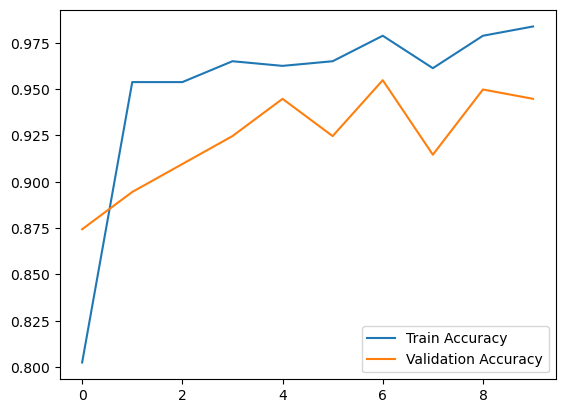

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set dataset paths
TRAIN_DIR = "C:/Users/thudi/Downloads/datasets/fire_dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification (Fire/No Fire)
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save the model
model.save("fire_detection_model.h5")
print("Model saved as fire_detection_model.h5")

# Plot training history
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()
